# <center> **ПРОЕКТ: Кластеризация изображений транспортных средств**
# ЧАСТЬ 2. Визуализация и интерпретация кластеров 

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull

import warnings 

plt.style.use('ggplot')
warnings.simplefilter("ignore")

RS = 12 # random_state

In [9]:
img_paths = pd.read_csv('data/images_paths.csv')

img_paths.head()

paths
0  veriwild\1\00001\000001.jpg
1  veriwild\1\00001\000002.jpg
2  veriwild\1\00001\000003.jpg
3  veriwild\1\00001\000004.jpg
4  veriwild\1\00001\000005.jpg

In [10]:
img_paths['paths'] = ('data/raw_data/' + 
                      img_paths['paths']
                      .str.replace('\\', '/'))

img_paths.head()

paths
0  data/raw_data/veriwild/1/00001/000001.jpg
1  data/raw_data/veriwild/1/00001/000002.jpg
2  data/raw_data/veriwild/1/00001/000003.jpg
3  data/raw_data/veriwild/1/00001/000004.jpg
4  data/raw_data/veriwild/1/00001/000005.jpg

In [23]:
def plot_samples_images(label, data=img_paths, nrows=3, ncols=7):
    """Функция для визуализации нескольких 
       случайных изображений из кластера cluster_label.
       Пути до изображений и метки кластеров должны быть 
       представлены в виде DataFrame со столбцами "paths" и "cluster".

    Args:
        data (DataFrame): таблица с разметкой изображений и соответствующих им кластеров
        cluster_label (int): номер кластера изображений
        nrows (int, optional): количество изображений по строкам таблицы (по умолчанию 3)
        ncols (int, optional): количество изображений по столбцам (по умолчанию 3)
    """
    
    # Фильтруем данные по номеру кластера
    samples_indexes = np.array(data[data['cluster'] == label].index)
    # Перемешиваем результаты
    np.random.shuffle(samples_indexes)
    # Составляем пути до изображений
    paths = data.loc[samples_indexes, 'paths']

    # Создаём фигуру и набор координатных плоскостей
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))
    fig.suptitle(f"Cluster {label}", fontsize=16)
    
    # Создаём циклы по строкам и столбцам в таблице с координатными плоскостями
    for i in range(nrows):
        for j in range(ncols):
            # Определяем индекс пути до изображения
            path_idx = i * ncols + j
            
            if path_idx >= len(paths):
                break
                
            # Извлекаем путь до изображения
            path = paths.iloc[path_idx]
            # Читаем изображение
            img = plt.imread(path)
            
            # Убираем пометки координатных осей
            axes[i,j].axis('off')
            # Отображаем его на соответствующей координатной плоскости
            axes[i,j].imshow(img)


def plot_clusters(X, y, title, n_samples=10000, img_data=img_paths):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        title (_type_): _description_
        n_components (_type_): _description_

    Returns:
        None: _description_
    """
    X_sample = X.sample(n_samples, random_state=RS, ignore_index=False)
    y_sample = y.loc[X_sample.index]
    
    tsne_decomposer = TSNE(n_components=3, random_state=RS, n_jobs=-1)
    X_tsne = tsne_decomposer.fit_transform(X_sample)
    
    tsne_data = pd.DataFrame(
        X_tsne, 
        columns=['x', 'y', 'z'], 
        index=X_sample.index
    )
    tsne_data['label'] = y_sample
    
    low, high = tsne_data.quantile(0.001), tsne_data.quantile(0.999)
    
    outs = (tsne_data
            [(tsne_data < low-10) | (tsne_data > high+10)]
            .dropna(axis=0, how='all')
            .index)
    tsne_data['label'].loc[outs] = -1
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    palette = 'muted'
    
    sns.scatterplot(tsne_data, 
                    x='x', y='y', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[0])
    sns.scatterplot(tsne_data, 
                    x='y', y='z', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[1])
    sns.scatterplot(tsne_data, 
                    x='x', y='z', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[2])

    fig.suptitle(title)
    fig.show()
    
    img_data = img_data.iloc[tsne_data.index]
    img_data['cluster'] = tsne_data['label']

    for i in np.unique(tsne_data['label']):
        plot_samples_images(i, img_data)
        
        
def make_data(name):
    X = pd.read_csv(f'new_data/X_{name}.csv')
    y = pd.read_csv(f'new_data/y_{name}.csv')
    
    Xy = pd.concat(
        [X, y.rename(columns={'0': 'label'})], 
        axis=1
    )
    
    display(Xy)
    
    return X, y

# **EFFICIENTNET**

In [24]:
X_effnet, y_effnet = make_data('effnet')

0         1         2         3         4  label
0       1.168531 -1.498564 -0.937184 -1.155295  0.023959      1
1      -0.008176 -1.270314 -1.489945 -0.680821 -1.410646      1
2      -5.039884 -0.399717  1.940004 -1.477292  0.199976      0
3      -0.130577 -0.991988 -3.417444 -0.435268  0.094067      1
4       1.620167  0.183150  0.379169 -1.064364  1.510495      1
...          ...       ...       ...       ...       ...    ...
416309  0.522065 -2.236756  0.248674 -0.482027  1.384721      1
416310  0.899970  1.037626  0.263308  0.510539  1.214488      1
416311  0.056464  1.833264  0.952469  0.948372  0.301585      1
416312 -1.592264 -1.122946 -1.775058  0.130894 -0.329619      1
416313  0.521056 -1.590567  0.571440 -1.587836 -1.213476      1

[416314 rows x 6 columns]

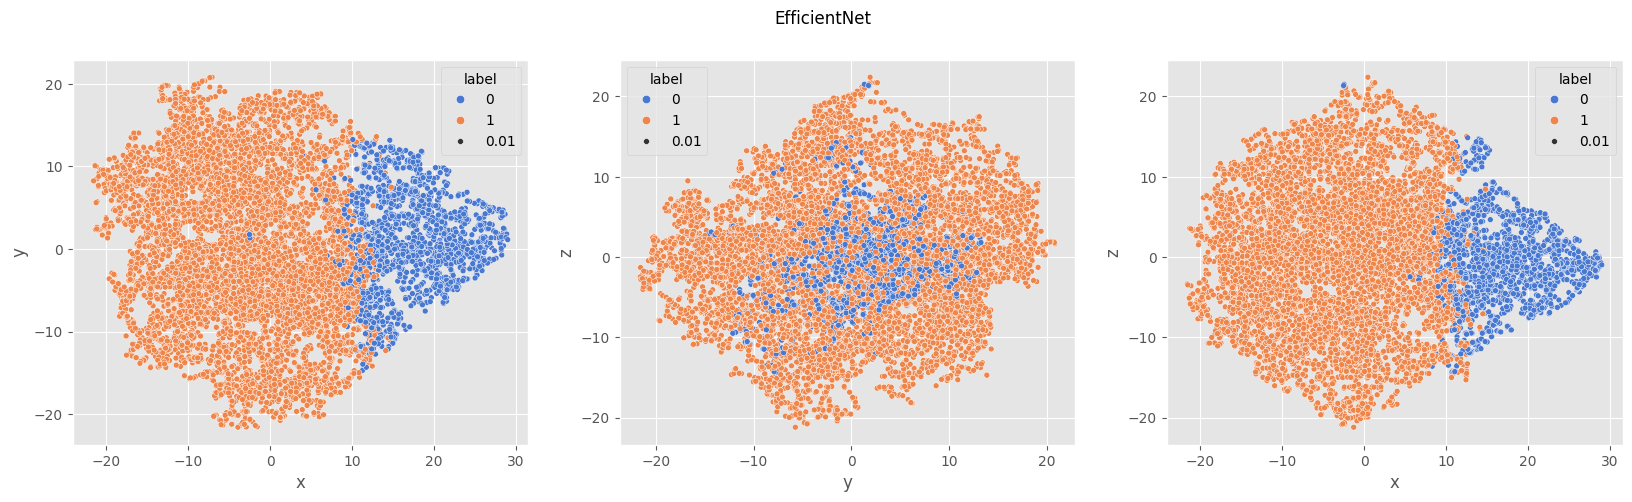

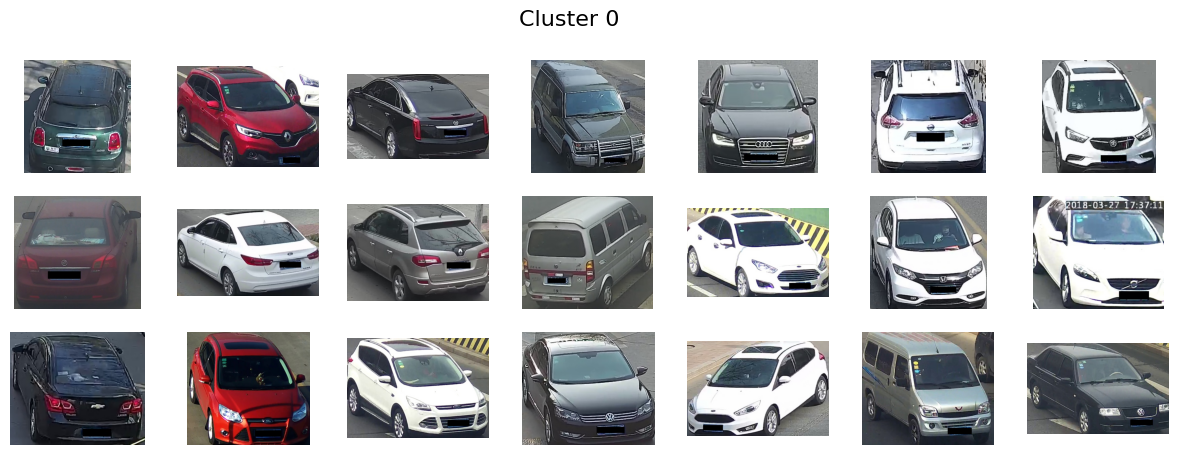

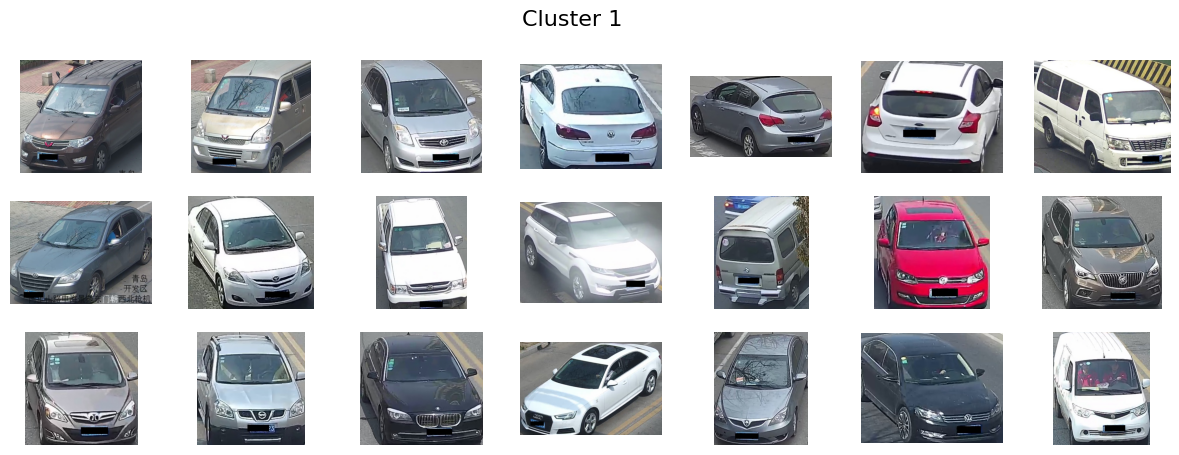

In [13]:
plot_clusters(X_effnet, y_effnet, 'EfficientNet') 

# **OSNET**

In [ ]:
X_osnet, y_osnet = make_data('osnet') 

0          1          2         3         4  label
0       12.129688  -4.219416   1.608565 -1.082148  4.096994      1
1       14.217608 -13.264335   5.429478 -2.167334  6.562240      1
2       15.183357   7.398927  10.614294  7.471836  3.723463      1
3       13.396866  -7.085932   3.276246 -3.362087  5.409219      1
4       13.405182   9.822798  14.307003 -0.694050  6.822851      1
...           ...        ...        ...       ...       ...    ...
416309  12.138761  -2.433866  13.002213  6.037016  6.178257      1
416310  12.976736   0.402497  -3.668944 -5.460716 -3.859462      1
416311  15.467766  -4.447553  -0.595061 -2.709295 -1.316807      1
416312  14.875208  -5.508747  -1.096525  0.140724 -1.226135      1
416313  18.144028  -1.146347  -3.636657  0.528351  0.457182      1

[416314 rows x 6 columns]

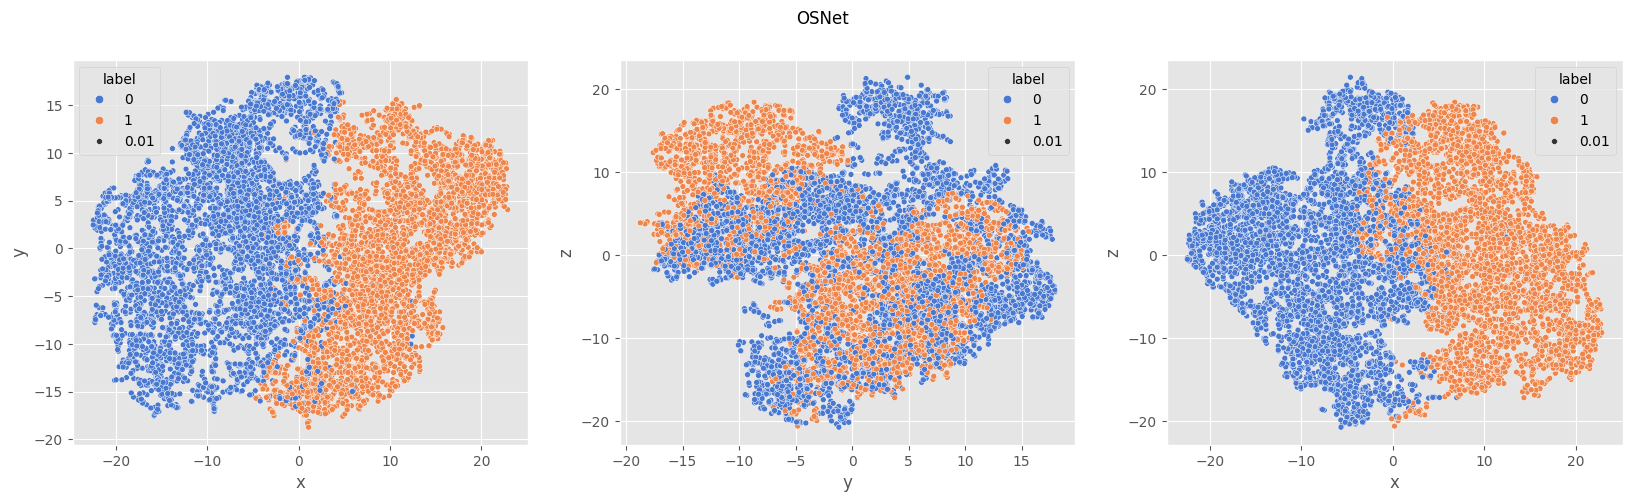

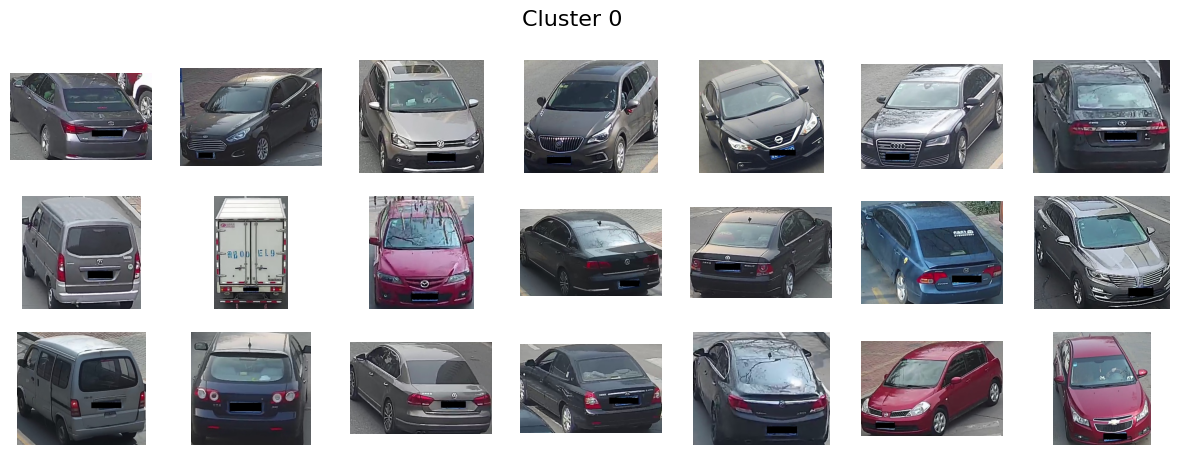

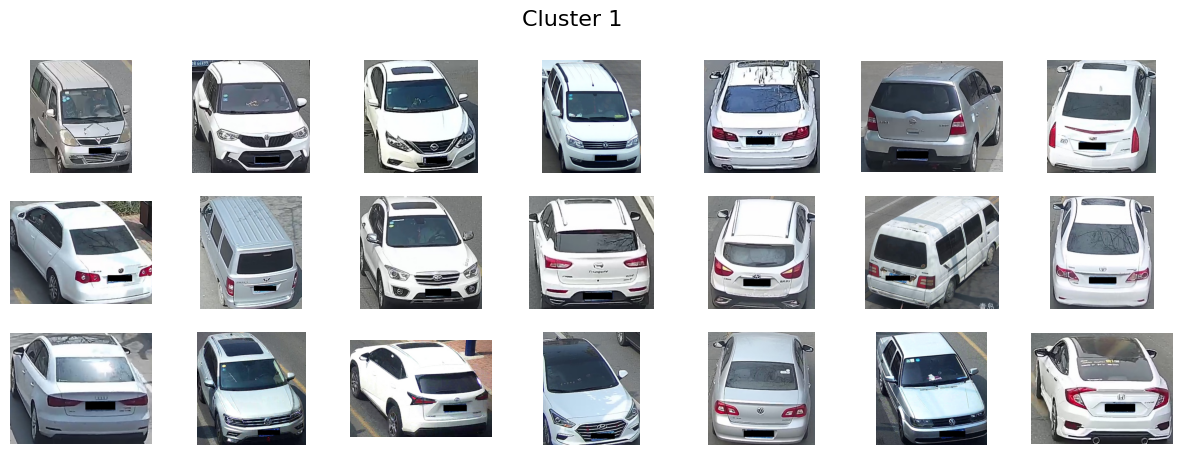

In [26]:
plot_clusters(X_osnet, y_osnet, 'OSNet') 